# QUESTION 1

1. Load the ./data/college_completion.csv data with Pandas.

In [2]:
# 1. import pandas & load dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/workspace/visualization/assignment/college_completion.csv',low_memory=False)

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

**ANSWER: the dataset has 63 columns and 3798 observations. Many variables are included (listed in output).**

In [3]:
# 2. 
print("Shape: \n", df.shape,'\n') 
print(df.head(),'\n') # print first few rows of the data
print(df.columns.tolist())

data_columns = df.columns.tolist()
column_count = len(data_columns)
print("Column count: \n", column_count)

Shape: 
 (3798, 63) 

   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN    

3. Cross tabulate control and level. Describe the patterns you see.

**PATTERNS: Private for-profit institutions have a 46.88% incidence rate of 2-year program stucture and a 53.12% incidence rate of 4-year program structure. Public institutions have a 59.43% incidence rate of 2-year program structure and a 40.57% incidence rate of 4-year program structure. Private not for-profit institutions have a 5.45% incidence rate of 2-year program structure and a 94.55% incidence rate of 4-year program structure.

This likely reflects that many community colleges are public, whereas private not-for-profit schools tend not to be community colleges.
Private for-profit schools are often fast-track degree programs, which reflects the high incidence rate of for-profit 2 year programs.**

In [4]:
print(pd.crosstab(df['control'],df['level']),'\n')
print(pd.crosstab(df['control'],df['level'], normalize = 'all'),'\n')

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632 

level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403 



4. generate histogram, kernel density plot, boxplot, and statistical description for the grad_100_value variable:

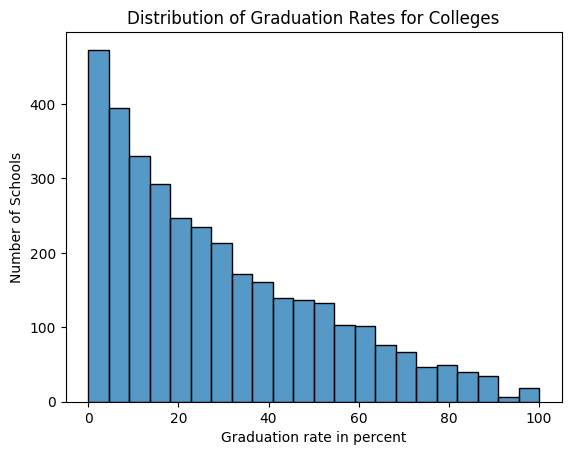

In [5]:
# HISTOGRAM:
import seaborn as sns

sns.histplot(df['grad_100_value'])
plt.xlabel('Graduation rate in percent')
plt.ylabel('Number of Schools')
plt.title('Distribution of Graduation Rates for Colleges')
plt.show()


The histogram shows a right-skewed distribution in graduation rate, with a high frequency of low graduation rates.

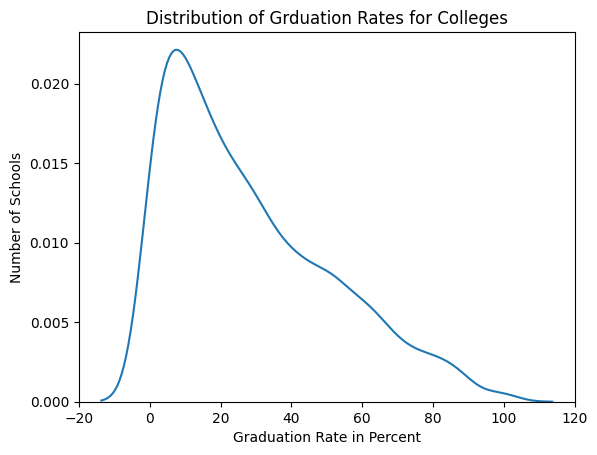

In [6]:

# KERNEL DENSITY PLOT
sns.kdeplot(df['grad_100_value'])
plt.xlabel('Graduation Rate in Percent')
plt.ylabel('Number of Schools')
plt.title('Distribution of Grduation Rates for Colleges')
plt.show()


This is also reflected in the KDP.

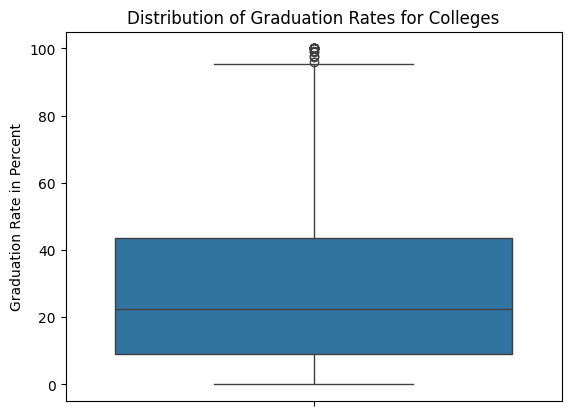



Distribution of Graduation Rates for Colleges:


count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [7]:

# BOXPLOT
sns.boxplot(df["grad_100_value"])
plt.ylabel('Graduation Rate in Percent')
plt.title('Distribution of Graduation Rates for Colleges')
plt.show()

print("\n")
# STATISTICAL DESCRIPTION
print( "Distribution of Graduation Rates for Colleges:" )
print("\n")
print( df['grad_100_value'].describe() )


According to the boxplot & stats table, the median graduation rate for all colleges in the dataset is 22.5% (which is shockingly low). The boxplot shows a few outliers in the higher range of graduation rates.

5. create kernel density plot for grad_100_value variable for level and control

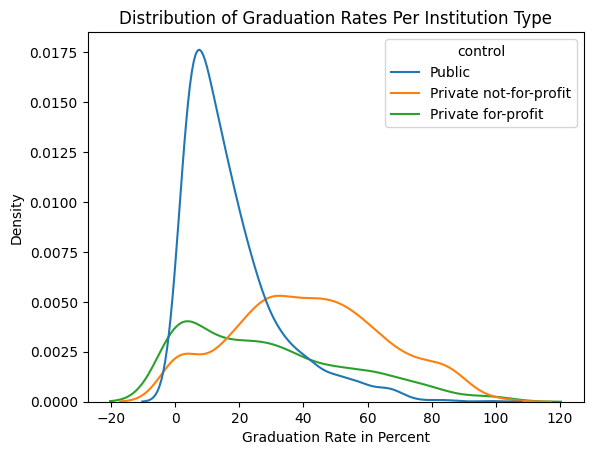

In [8]:
# 5. create kernel density plot for grad_100_value variable for level and control

sns.kdeplot(data=df,x='grad_100_value',hue="control")
plt.xlabel('Graduation Rate in Percent')
plt.title('Distribution of Graduation Rates Per Institution Type')
plt.show()


We see here that public schools are responsible for the peak in low graudation rates. Both forms of private college display more uniform grad rate distribution.

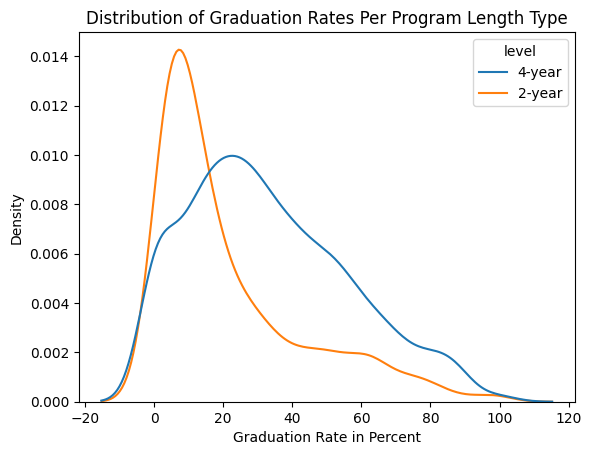

In [9]:


sns.kdeplot(data=df,x='grad_100_value',hue='level')
plt.xlabel('Graduation Rate in Percent')
plt.title('Distribution of Graduation Rates Per Program Length Type')
plt.show()



In [10]:

print(df.loc[:,['control','grad_100_value']].groupby('control').describe())
print(df.loc[:,['level','grad_100_value']].groupby('level').describe())

                       grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8  
       grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   

From these tables, we see that private, not for profit institutions tend to have the best graduation rates out of the "control" classification options, at a median 41% grad rate. 4 year programs have higher grad rate out of the "level" category, with a 29.7% median grad rate.

6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

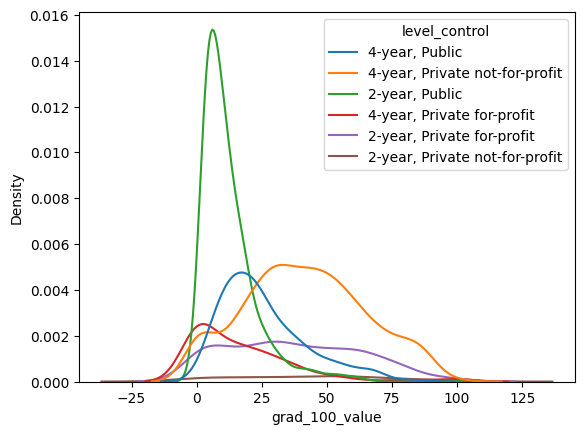

<Figure size 640x480 with 0 Axes>

In [11]:
df['level_control']=df['level']+', '+df['control']
sns.kdeplot(data=df,x='grad_100_value',hue='level_control')
plt.show()
plt.savefig("level_control.png")


This plot shows that 2 year public universities have a large proportion of low grad rates, which makes sense given previous EDA. It appears that private NFP 4-year universities have the highest grad rates on average, which is also supported by previous analysis.

In [12]:

print( df.loc[:,['level','control','grad_100_value']].groupby(['level','control']).describe() ) # describe data in the level_control plot


                              grad_100_value                             \
                                       count       mean        std  min   
level  control                                                            
2-year Private for-profit              461.0  37.197614  25.497380  0.0   
       Private not-for-profit           68.0  41.913235  28.348302  0.0   
       Public                          926.0  12.400000  10.893600  0.0   
4-year Private for-profit              318.0  17.382704  20.788525  0.0   
       Private not-for-profit         1121.0  41.645674  23.243453  0.0   
       Public                          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
level  control                                              
2-year Private for-profit      15.800  33.9  57.800  100.0  
       Private not-for-profit  16.225  44.4  61.200  100.0  
       Public      


According to the descriptive analysis chart, 2-year private not-for-profit instituions have the highest median grad rate
at 44.4%. 4-year not-for-profit institutions have the second highest median grad rate at 41%. This matches the appearance of the KDP above.


7. Make a kernel density plot of aid_value. Now group your graph by level and control. What explains the shape of the graph? Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.


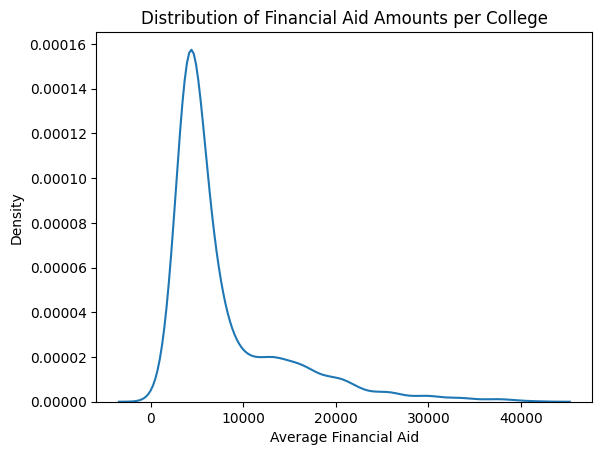

In [13]:

# regular kde plot for aid_value

sns.kdeplot(df['aid_value'])
plt.xlabel('Average Financial Aid')
plt.title('Distribution of Financial Aid Amounts per College')
plt.show()


Graph shows a strong right skew, indicating that it's common for colleges to give low amounts of financial aid.

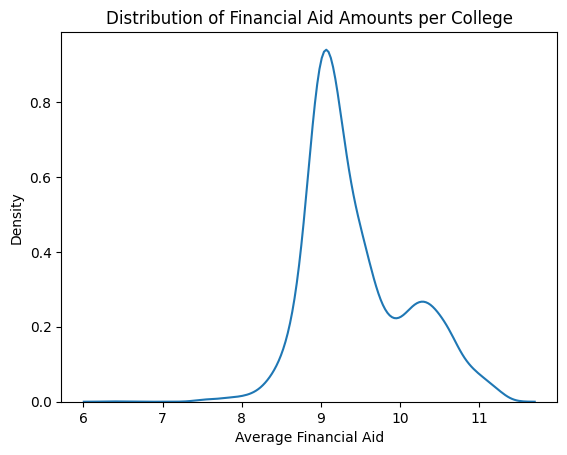

In [14]:


df['aid_value_arcsinh'] = np.arcsinh(df['aid_value'])
sns.kdeplot(data=df,x='aid_value_arcsinh')
plt.xlabel('Average Financial Aid')
plt.title('Distribution of Financial Aid Amounts per College')
plt.show()


Arcsinh graph shows a less normal distribution, with an addional (small) peak.

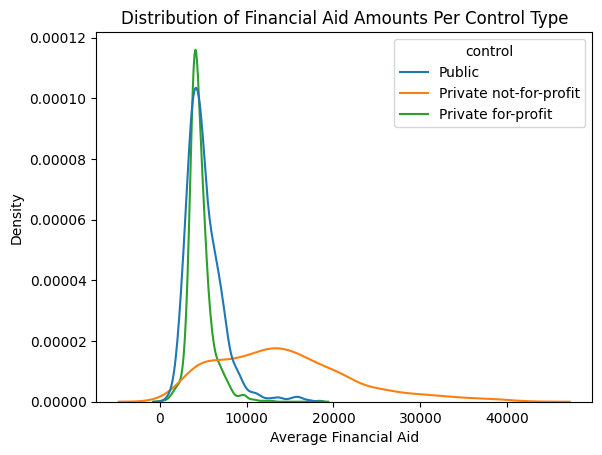

In [15]:

# group by level and control

sns.kdeplot(data=df,x='aid_value',hue='control')
plt.xlabel('Average Financial Aid')
plt.title('Distribution of Financial Aid Amounts Per Control Type')
plt.show()


This KDP (grouped by control) shows that private FP universities and public universities influence the strong peak at low financial aid levels. Private NFP universities have a more uniform distribution for aid amount, with a small peak around $15k which is seen in the arcsinh graph.

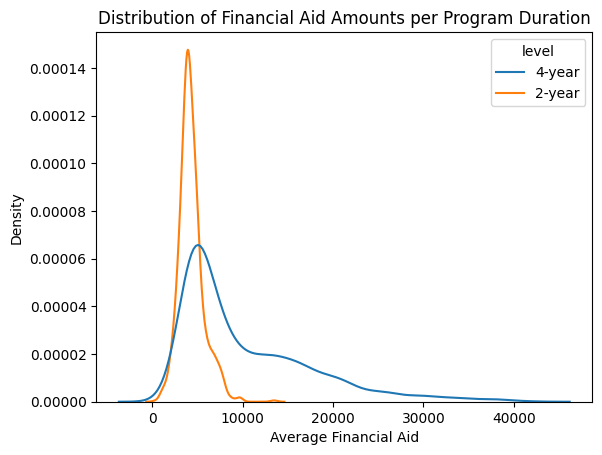

In [16]:

sns.kdeplot(data=df,x='aid_value',hue='level')
plt.xlabel('Average Financial Aid')
plt.title('Distribution of Financial Aid Amounts per Program Duration')
plt.show()


2 year schools also contribute to the peak at low aid levels. 4 year schools contributed to the right skew of the original KDP.

In [17]:

# make table comparing aid value statistics for different controls
print( df.loc[:,['control','aid_value']].groupby('control').describe() )

# make table comparing aid value statistics for different levels
print( df.loc[:,['level','aid_value']].groupby('level').describe() )


                       aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0  
       aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                  


Public and private for-profit universities have low median aid values compared to private NFP universities, and both of 
their graphs have a strong peak at around $4,500. This explains the large amount of universities with median aid amounts 
around this amount, as shown in the graph hich combines controls. Two year schools also give out less aid, on average,
than 4-year-schools, which contributes to the peak effect on the combined kde graph.abs


8. Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?


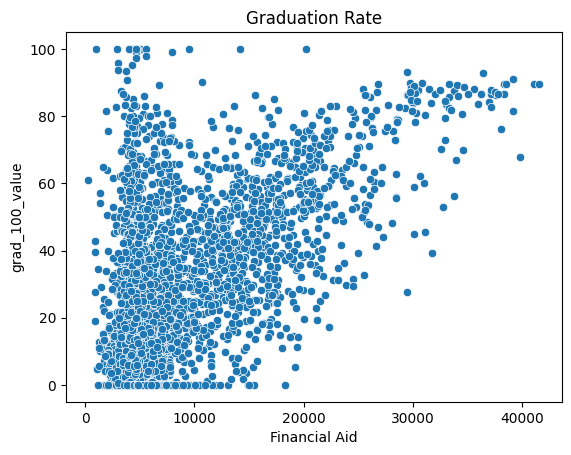

In [18]:


# make scatter for grad rate and aid value
sns.scatterplot(data=df, x="aid_value", y="grad_100_value")
plt.xlabel('Financial Aid')
plt.title('Graduation Rate')
plt.show()

Observations: one section of the data appears to reflect a positive association between aid value and graduation rate.
However, there is a section of aid values (on the lower side of the aid value sprectrum) for which aid value appears to
have no correlation with graduation rate.


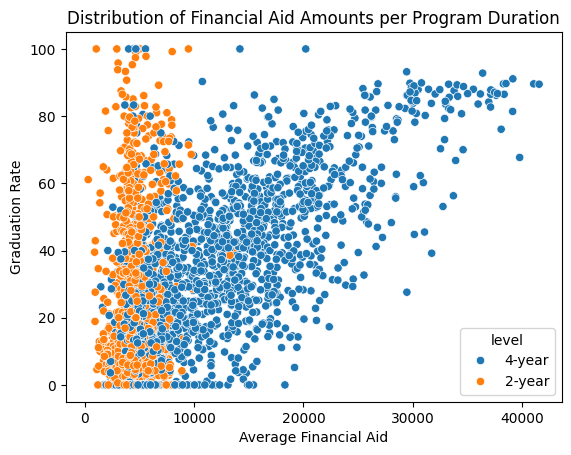

In [19]:

# make the same plot, grouping by level and then control

# Group by level:
sns.scatterplot(data=df,x='aid_value',y="grad_100_value",hue='level')
plt.xlabel('Average Financial Aid')
plt.ylabel('Graduation Rate')
plt.title('Distribution of Financial Aid Amounts per Program Duration')
plt.show()


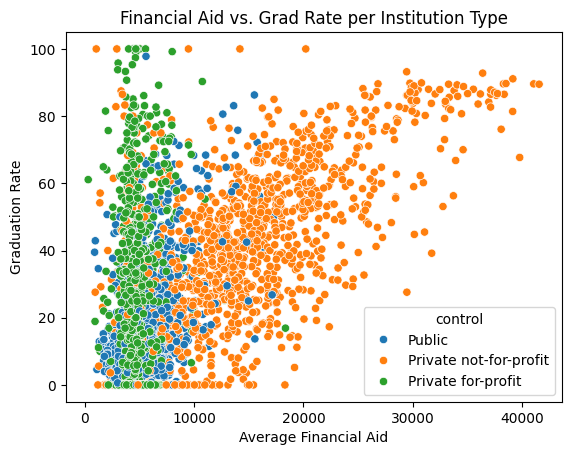

In [20]:

# Group by control:
sns.scatterplot(data=df,x='aid_value',y="grad_100_value",hue='control')
plt.xlabel('Average Financial Aid')
plt.ylabel('Graduation Rate')
plt.title('Financial Aid vs. Grad Rate per Institution Type')
plt.show()


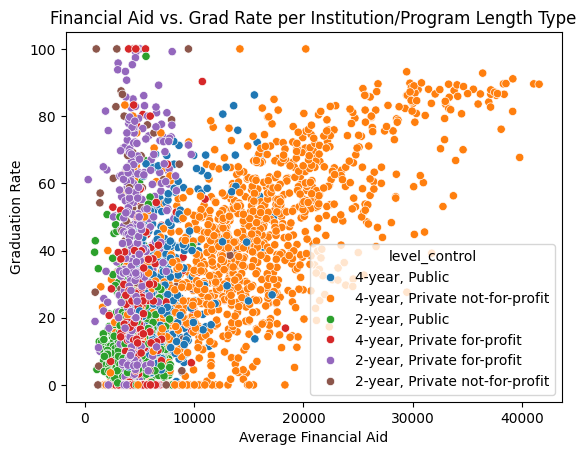

In [21]:

# make scatter incorporating level_control variable
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='level_control')
plt.xlabel('Average Financial Aid')
plt.ylabel('Graduation Rate')
plt.title('Financial Aid vs. Grad Rate per Institution/Program Length Type')
plt.show()



Aid seems to increase graduation rates primarily for 4-year private, not for profit universities. This makes sense, 
as 4 year private universities tend to have high tuition rates which carry over four years. Therefore, it is reasonable
financial aid would have a higher marinal impact on graduation rates for these schools, when compared to 2 year schools 
and private schools. However, it's interesting that 4 year private for-profit institutions seem to exhibit less positive association 
between financial and grad rate.

# QUESTION 4

1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data

In [22]:
df = pd.read_csv('/workspace/visualization/assignment/data/Medicare_Telehealth_Trends_Q1_2024.csv',low_memory=False)

2. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.

ANSWER:  In the geography section (which identifies where a data point was collected), it's stated that: "If a beneficiary’s state of residence is unknown, the beneficiary is assigned to the “Missing Data” category. Data aggregated at the National level are identified by "National'". 

The data dictionary is descriptive in terms of variable definitions, but many variables have odd names that would not be recognized without referencing the dictionary.

3. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.

  Variables: 
1. Pct_Telehealth --> Indicates the Percentage of Medicare Users with a Telehealth Service.
3. Bene_Age_Desc --> Indicates Beneficiary Age numerically. It would be interesting to assess whether age has an assoication with likelihood of using telehealth services.

In [28]:
# Clean Pct_Telehealth
df.rename(columns={"Pct_Telehealth": "Telehealth"}, inplace=True)  # Rename variable for ease of use
df['Telehealth'] = pd.to_numeric(df['Telehealth'], errors='coerce') # find any values remaining that are non-numeric and change them to NaN
# remove any rows with value of NaN in telehealth column
df = df.dropna(subset=['Telehealth'])
# it looks like this worked

# Clean Bene_Age_Desc Variable
df.rename(columns={"Bene_Age_Desc": "Age"}, inplace=True)  # Rename variable for ease of use
df['Age'] = df['Age'].replace("All", np.nan) # turn items with "All" value to null
df = df.dropna(subset=['Age']) # drop rows with null values
unique_values = df['Age'].unique() # find all unique values in the column
print(unique_values) # print unique values to see what we're working with

['0-64' '65-74' '75-84' '85 and over']


5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?

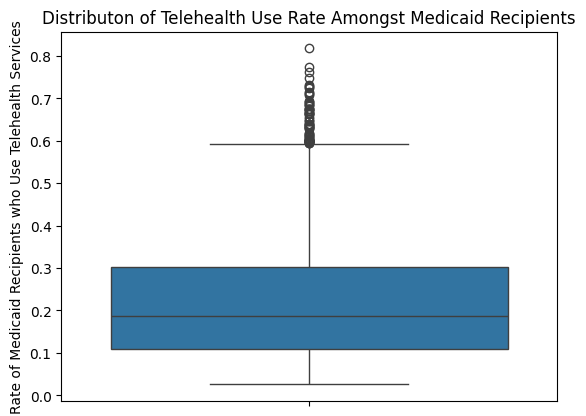

In [24]:
# BOXPLOT for Telehealth
sns.boxplot(df["Telehealth"])
plt.ylabel('Rate of Medicaid Recipients who Use Telehealth Services')
plt.title('Distributon of Telehealth Use Rate Amongst Medicaid Recipients')
plt.show()


The boxplot shows a strong right skew, with a low average rate of telehealth use amongst medicaid recipients. There are many outliers on the high end of the spectrum.

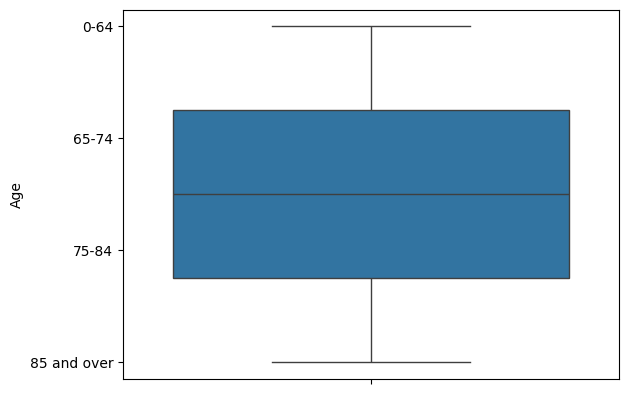

<Figure size 640x480 with 0 Axes>

In [29]:

# BOXPLOT for Age
sns.boxplot(df["Age"])
plt.show()
plt.savefig("age_boxplot")

Boxplot shows a median recipient age of around 75 years old, with a very uniform distribution. There are no outliers.

6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 

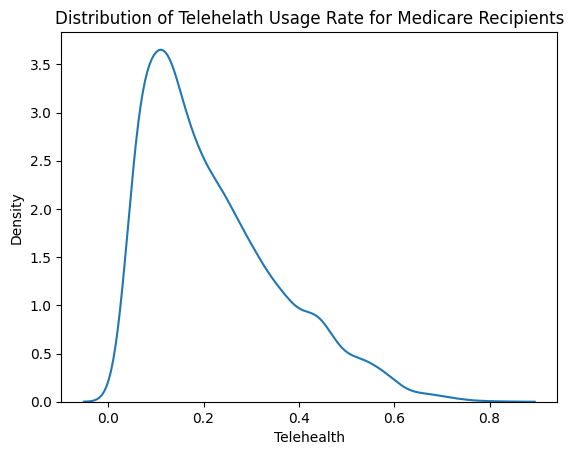

In [29]:
sns.kdeplot(df['Telehealth'])
plt.xlabel('Telehealth')
plt.title('Distribution of Telehelath Usage Rate for Medicare Recipients')
plt.show()

The graph is right skewed, indicating that a high proportion of medicare recipients do not utilize telehealth services. The graph does not appear to need addional transformations for rescale.

7. Create a scatter plot, and describe the relationship you see.

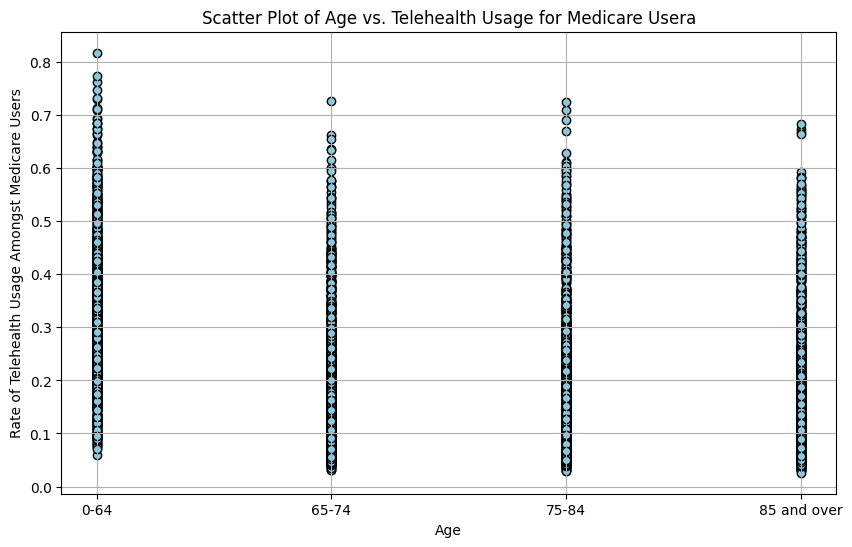

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Telehealth'], color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Rate of Telehealth Usage Amongst Medicare Users')
plt.title('Scatter Plot of Age vs. Telehealth Usage for Medicare Usera')
plt.grid(True)
plt.show()

This scatterplot suggests that as medicare users age, they are less likely to utilize telehealth services.

8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [32]:
print("Covariance of Telehealth Use and Age: \n", df.loc[:,['Telehealth','Age']].cov())

ValueError: could not convert string to float: '0-64'